In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car = pd.read_csv('/content/drive/MyDrive/car data.csv')  #give path to data
car.columns = [i.lower() for i in car.columns]
print("Number of rows : ",car.shape[0])
print("Number of columns : ",car.shape[1])


# drop duplicates rows if present
car.drop_duplicates(keep = 'first',inplace = True)

# resetting index 
car.reset_index(inplace = True,drop = True)

Number of rows :  301
Number of columns :  9


In [ ]:
car.head(10)

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
#checking for missing values
car.isnull().sum()

car_name         0
year             0
selling_price    0
present_price    0
kms_driven       0
fuel_type        0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
# data types of features
print("Numerical feature : ")
print(car.select_dtypes(include = "number").columns)
print("\n Categorical feature : ")
print(car.select_dtypes(exclude = "number").columns)

Numerical feature : 
Index(['year', 'selling_price', 'present_price', 'kms_driven', 'owner'], dtype='object')

 Categorical feature : 
Index(['car_name', 'fuel_type', 'seller_type', 'transmission'], dtype='object')


In [ ]:
# info of the dataset ,
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       299 non-null    object 
 1   year           299 non-null    int64  
 2   selling_price  299 non-null    float64
 3   present_price  299 non-null    float64
 4   kms_driven     299 non-null    int64  
 5   fuel_type      299 non-null    object 
 6   seller_type    299 non-null    object 
 7   transmission   299 non-null    object 
 8   owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.1+ KB


In [ ]:
# Summary statistics of the dataset
car.describe()

,year,selling_price,present_price,kms_driven,owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Explanatory Data Analysis
### 1. Which vehicle got highest price ?

In [ ]:
car[car.present_price == car.present_price.max()][['car_name','present_price']]

,car_name,present_price
85,land cruiser,92.6


## 2. Top 10 vehicles available for sale pie chart

In [ ]:
px.pie(data_frame = car ,names = car.car_name.value_counts().head(10).index,values = car.car_name.value_counts().values[0:10],
      title = "Sales pie chart for top 10 vehicles",hole = 0.7
      )

# Year wise availability of vehicles for sale

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "year v/s vehicle's availabel for sell ")

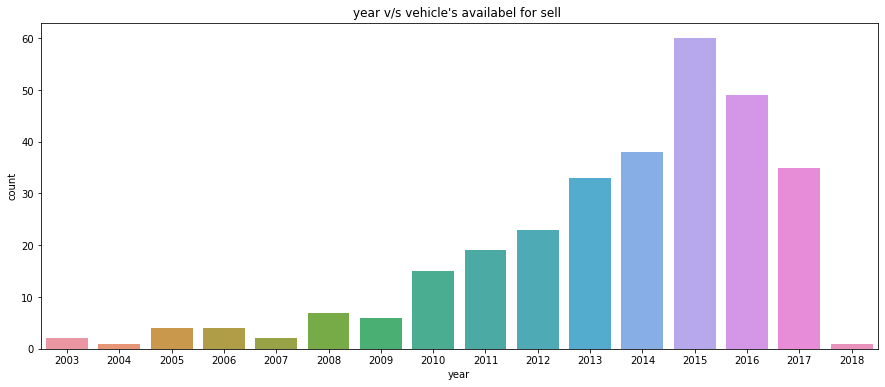

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
sns.countplot(car['year'])
plt.title("year v/s vehicle's availabel for sell ")

# Saling price vs present price

Text(0, 0.5, 'Price')

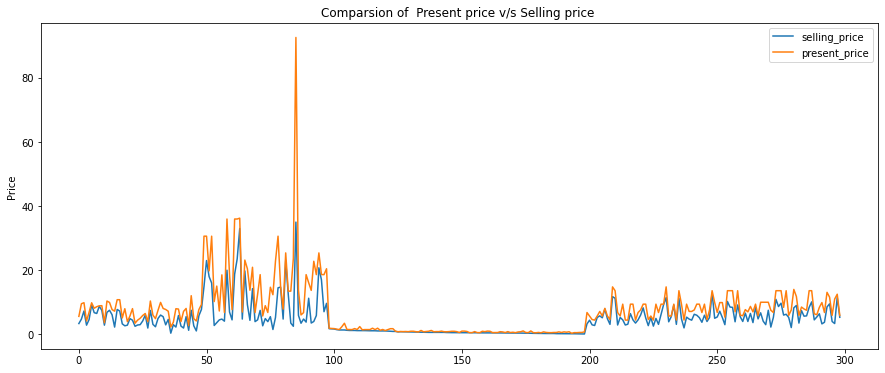

In [ ]:
car[["selling_price","present_price"]].plot(kind = 'line')
plt.title("Comparsion of  Present price v/s Selling price ")
plt.ylabel("Price")

# Pie chart for type of fuel used

In [ ]:
px.pie(data_frame = car ,names = car.fuel_type.value_counts().index,values = car.fuel_type.value_counts().values,
      title = "Vehicle Fuel Type " ,hole = 0.7
      )

# Pie chart for Transmission used by vehicle

In [ ]:
px.pie(data_frame = car ,names = car.transmission.value_counts().index,values = car.transmission.value_counts().values,
      title = "Vehicle transmission type " ,hole = 0.7
      )

# Relationship between selling price v/s kms_driven

In [ ]:
px.scatter(data_frame = car,y = car['selling_price'],x =  car['kms_driven'],title = 'selling_price v/s kms_driven')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



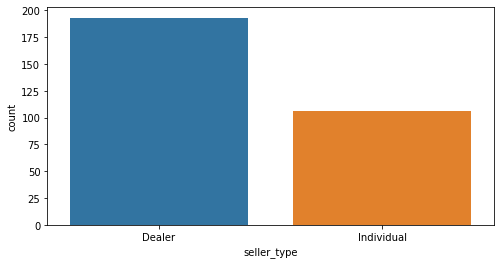

In [ ]:
# Seller type count plot
plt.rcParams['figure.figsize'] = (8,4)
sns.countplot(car['seller_type'])

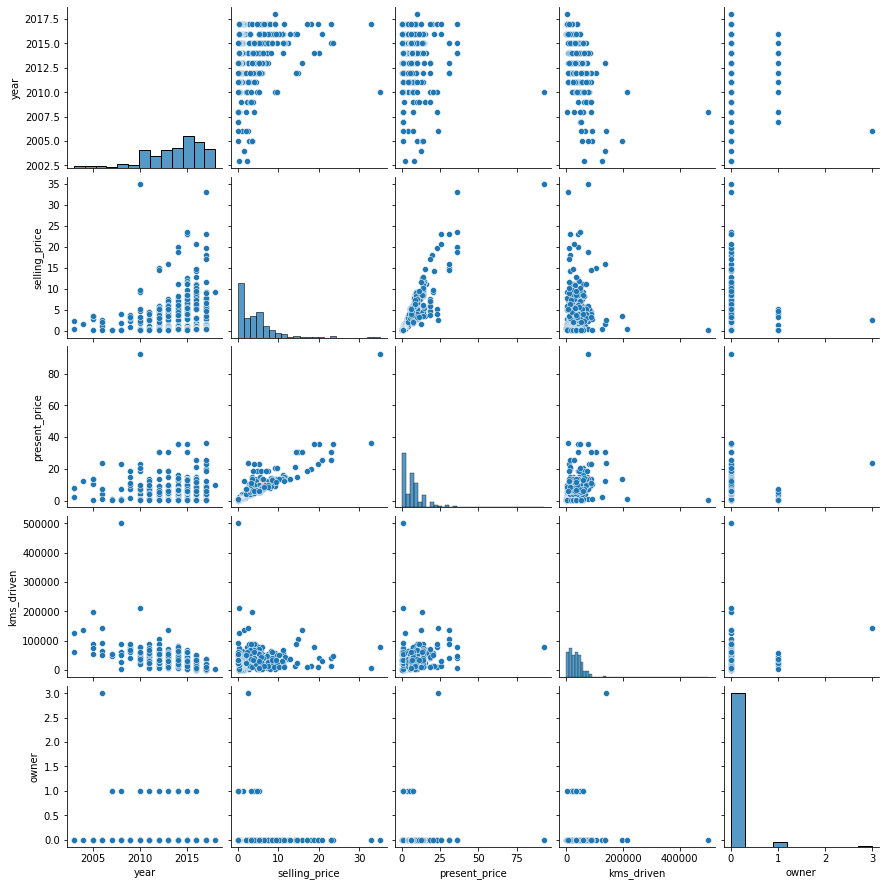

In [ ]:
sns.pairplot(car)

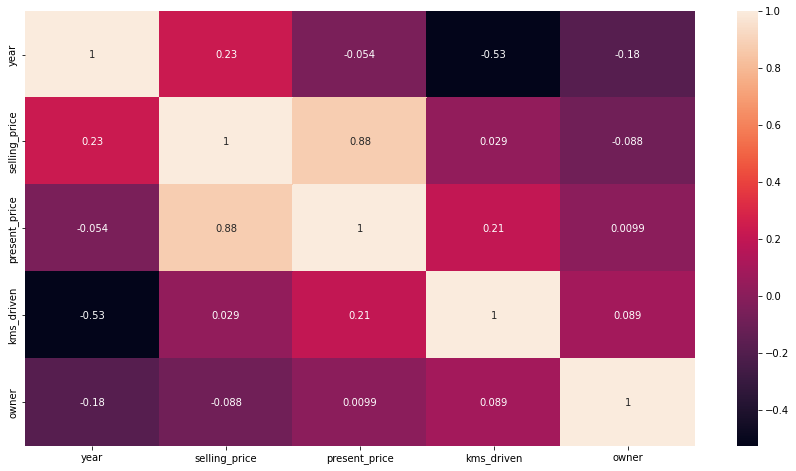

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(car.corr(),annot = True)